In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
df= pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
df.drop(["Unnamed: 0"], axis=1,inplace=True)

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
numerical = df.select_dtypes(int)

In [5]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [6]:
categoricals = df.select_dtypes(object)


## Activity 6

### One Hot/Label Encoding of the categorical variables in the categoricals data frame

In [7]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


I am goind to delete "effective_to_date" because it doesn't make sense to make dummies from every date. In addition we already have a "Month" column.

In [8]:
categoricals.drop(["effective_to_date"],axis=1,inplace=True)

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
categoricals

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


#### Which one are ordinals? 
As we have some columns with an order, we want to change it manually

In [10]:
categoricals.coverage.unique()

array(['basic', 'extended', 'premium'], dtype=object)

In [11]:
categoricals["coverage"]  = categoricals["coverage"].replace({'basic': '0', 'extended': '1', 'premium': '2'})

<ipython-input-11-e1d9039445fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["coverage"]  = categoricals["coverage"].replace({'basic': '0', 'extended': '1', 'premium': '2'})


In [12]:
categoricals.education.unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [13]:
categoricals["education"]  = categoricals["education"].replace({'high school or below': '0', 'college': '1', 'bachelor': '2', 'master': '3', 'doctor': '4'})

<ipython-input-13-b3e6e3c73703>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["education"]  = categoricals["education"].replace({'high school or below': '0', 'college': '1', 'bachelor': '2', 'master': '3', 'doctor': '4'})


In [14]:
categoricals.month.unique()

array(['feb', 'jan'], dtype=object)

In [15]:
categoricals["month"]  = categoricals["month"].replace({'jan': '0', 'feb': '1'})

<ipython-input-15-817c78909473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["month"]  = categoricals["month"].replace({'jan': '0', 'feb': '1'})


In [16]:
categoricals.vehicle_size.unique()

array(['medsize', 'small', 'large'], dtype=object)

In [17]:
categoricals["vehicle_size"]  = categoricals["vehicle_size"].replace({'small': '0', 'medsize': '1','large': '2' })

<ipython-input-17-8b0165ea3450>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["vehicle_size"]  = categoricals["vehicle_size"].replace({'small': '0', 'medsize': '1','large': '2' })


In [73]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   coverage                         10689 non-null  object
 1   education                        10689 non-null  object
 2   month                            10689 non-null  object
 3   vehicle_size                     10689 non-null  object
 4   region_east                      10689 non-null  uint8 
 5   region_north west                10689 non-null  uint8 
 6   region_west region               10689 non-null  uint8 
 7   response_yes                     10689 non-null  uint8 
 8   employment_status_employed       10689 non-null  uint8 
 9   employment_status_medical leave  10689 non-null  uint8 
 10  employment_status_retired        10689 non-null  uint8 
 11  employment_status_unemployed     10689 non-null  uint8 
 12  gender_m                        

#### Which one are nominals? 

Just use get dummies, as we don't need an order

In [19]:
categoricals = pd.get_dummies(data=categoricals, columns=['region', 'response','employment_status','gender','location_code','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class'], drop_first=True)

### Remove the outliers from the numerical columns

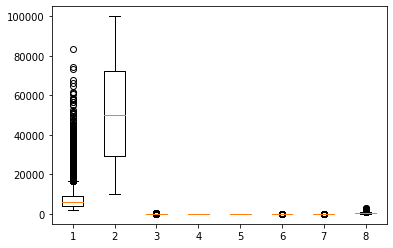

In [20]:
plt.boxplot(numerical)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8ad767dc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8ad768c3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8ad767d8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8ad768caf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8ad768ce80>],
 'means': []}

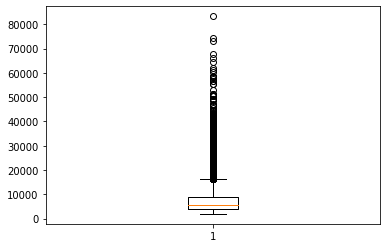

In [21]:
plt.boxplot(numerical['customer_lifetime_value']) #1

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8ad763c2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8ad763ca00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8ad766ff10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8ad7607160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8ad76074f0>],
 'means': []}

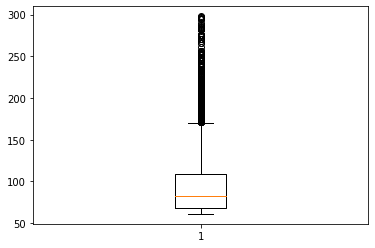

In [22]:
plt.boxplot(numerical['monthly_premium_auto']) #3

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8ad75e1550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8ad75e1c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8ad75e11c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8ad75eb3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8ad75eb760>],
 'means': []}

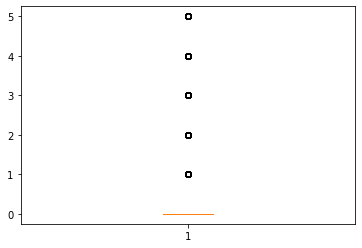

In [23]:
plt.boxplot(numerical['number_of_open_complaints']) #6

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8ad7543550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8ad7543c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8ad75431c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8ad754e3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8ad754e760>],
 'means': []}

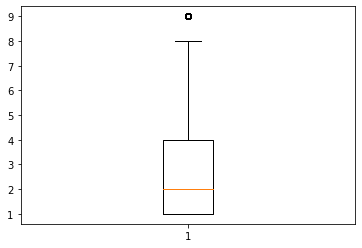

In [24]:
plt.boxplot(numerical['number_of_policies']) #7

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8ad752a9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8ad7538130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8ad752a640>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8ad7538850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8ad7538be0>],
 'means': []}

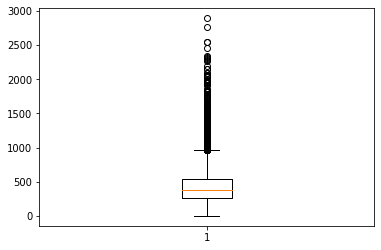

In [25]:
plt.boxplot(numerical['total_claim_amount']) #8

I decide to remove outliers on columns 1,3,8, where there are a lot.

In [26]:
from scipy.stats import scoreatpercentile as pct
from scipy.stats import iqr
def remove_outliers(df):
    pct_75 = pct(df, 75)  # Calculate percentile 75 using scipy function scoreatpercentile
    pct_25 = pct(df, 25)  # Calculate percentile 25 using scipy function scoreatpercentile
    upper_bound = pct_75 + 1.5*iqr(df)  # iqr - > Scipy function to calculate the Interquartile Range
    lower_bound = pct_25 - 1.5*iqr(df)
    df = df[(df <= upper_bound) & (df >= lower_bound)]  # Filter out the outliers
    return df

In [27]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [28]:
numerical['customer_lifetime_value'] = remove_outliers(numerical['customer_lifetime_value'])
numerical['monthly_premium_auto'] = remove_outliers(numerical['monthly_premium_auto'])
numerical['total_claim_amount'] = remove_outliers(numerical['total_claim_amount'])

<ipython-input-28-832a2db24056>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical['customer_lifetime_value'] = remove_outliers(numerical['customer_lifetime_value'])
<ipython-input-28-832a2db24056>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical['monthly_premium_auto'] = remove_outliers(numerical['monthly_premium_auto'])
<ipython-input-28-832a2db24056>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [29]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.0,48029,61.0,7,52,0,9,292.0
1,2228.0,26794,64.0,3,26,0,1,744.0
2,14947.0,22139,100.0,34,31,0,2,480.0
3,NaN,49078,97.0,10,3,0,2,484.0
4,9025.0,23675,117.0,15,31,1,7,707.0
...,...,...,...,...,...,...,...,...
10684,15563.0,64811,NaN,8,40,2,7,NaN
10685,5259.0,61146,65.0,7,68,0,6,273.0
10686,NaN,39837,NaN,11,63,0,2,381.0
10687,11971.0,64195,158.0,0,27,4,6,618.0


In [30]:
round(numerical.isna().sum()/len(numerical),4)*100 

customer_lifetime_value          8.99
income                           0.00
monthly_premium_auto             4.74
months_since_last_claim          0.00
months_since_policy_inception    0.00
number_of_open_complaints        0.00
number_of_policies               0.00
total_claim_amount               5.01
dtype: float64

In [31]:
#As we have removed some outliers, now we have some NaN

**replace Nan with mean values**

In [32]:
numerical["customer_lifetime_value"] = numerical["customer_lifetime_value"].fillna(numerical["customer_lifetime_value"].mean())
numerical["monthly_premium_auto"] = numerical["monthly_premium_auto"].fillna(numerical["monthly_premium_auto"].mean())
numerical["total_claim_amount"] = numerical["total_claim_amount"].fillna(numerical["total_claim_amount"].mean())

<ipython-input-32-61d6df3dcdb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["customer_lifetime_value"] = numerical["customer_lifetime_value"].fillna(numerical["customer_lifetime_value"].mean())
<ipython-input-32-61d6df3dcdb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["monthly_premium_auto"] = numerical["monthly_premium_auto"].fillna(numerical["monthly_premium_auto"].mean())
<ipython-input-32-61d6df3dcdb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [33]:
round(numerical.isna().sum()/len(numerical),4)*100 

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

In [34]:
#We don't have more NaNs!

### check if there are highly correlated features and drop them if there are any.

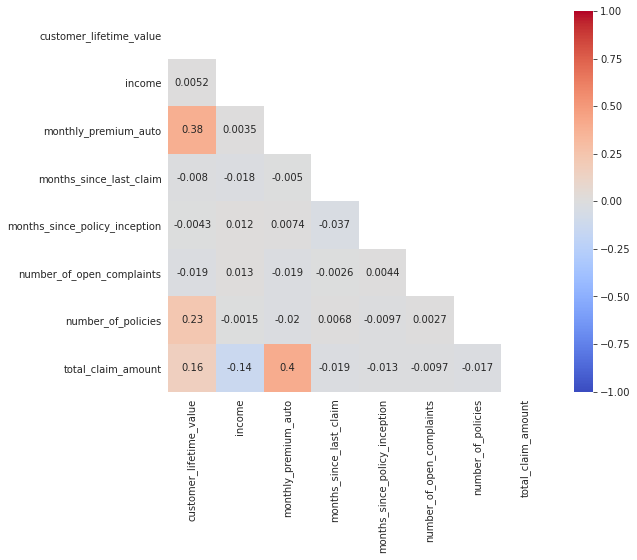

In [35]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### X-y split (y is the target variable which is the total claim amount)

In [36]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.000000,48029,61.00000,7,52,0,9,292.00000
1,2228.000000,26794,64.00000,3,26,0,1,744.00000
2,14947.000000,22139,100.00000,34,31,0,2,480.00000
3,6279.879934,49078,97.00000,10,3,0,2,484.00000
4,9025.000000,23675,117.00000,15,31,1,7,707.00000
...,...,...,...,...,...,...,...,...
10684,15563.000000,64811,87.54174,8,40,2,7,389.34246
10685,5259.000000,61146,65.00000,7,68,0,6,273.00000
10686,6279.879934,39837,87.54174,11,63,0,2,381.00000
10687,11971.000000,64195,158.00000,0,27,4,6,618.00000


In [37]:
categoricals

,coverage,education,month,vehicle_size,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,2,1,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3,1,1,0,1,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2,2,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,2,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
10685,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
10686,1,2,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
10687,2,1,1,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [37]:
df = pd.concat([numerical, categoricals], axis=1)
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,coverage,education,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,4809.000000,48029,61.00000,7,52,0,9,292.00000,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2228.000000,26794,64.00000,3,26,0,1,744.00000,0,1,...,0,1,0,1,0,0,0,0,0,0
2,14947.000000,22139,100.00000,34,31,0,2,480.00000,0,2,...,1,0,0,1,0,0,0,0,1,0
3,6279.879934,49078,97.00000,10,3,0,2,484.00000,1,1,...,0,0,1,0,0,0,0,0,0,0
4,9025.000000,23675,117.00000,15,31,1,7,707.00000,2,2,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563.000000,64811,87.54174,8,40,2,7,389.34246,2,2,...,1,0,0,0,1,1,0,0,0,0
10685,5259.000000,61146,65.00000,7,68,0,6,273.00000,0,1,...,0,0,1,0,0,0,0,0,0,0
10686,6279.879934,39837,87.54174,11,63,0,2,381.00000,1,2,...,0,0,0,0,1,0,1,0,0,0
10687,11971.000000,64195,158.00000,0,27,4,6,618.00000,2,1,...,0,0,1,0,0,0,0,0,1,0


<b>Data Splitting: for now we are going tp use only numerical

In [38]:
X = df.drop("total_claim_amount", axis=1)
y = df["total_claim_amount"]

## Activity 7

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

### ALL THE TRANSFORMATIONS HAS TO BEEN DONE AFTER THE SPLITTING AND APPLIED TO A NEW X_TRAIN CALLED X_TRAIN_SCALED OR X_TRAIN_TRANSFORMATION OR WHATEVER

<b>First transformation: Standarize the data

In [40]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [41]:
X_train_scaled

array([[ 3.17707560e-01, -1.26326670e+00, -7.87298403e-01, ...,
        -2.36084422e-01, -4.88612036e-01,  1.95232568e+00],
       [-3.90649189e-01, -1.36853038e+00, -8.77775143e-01, ...,
        -2.36084422e-01, -4.88612036e-01,  1.95232568e+00],
       [-6.01023388e-01,  2.62996460e-01,  1.02223640e+00, ...,
        -2.36084422e-01,  2.04661352e+00, -5.12209623e-01],
       ...,
       [-1.24539536e+00, -1.16342071e+00, -1.14920536e+00, ...,
        -2.36084422e-01, -4.88612036e-01,  1.95232568e+00],
       [-2.57829191e-03,  9.76566223e-01, -9.68251883e-01, ...,
        -2.36084422e-01, -4.88612036e-01, -5.12209623e-01],
       [ 3.21479618e+00, -1.43891878e-02, -6.06344923e-01, ...,
        -2.36084422e-01, -4.88612036e-01, -5.12209623e-01]])

In [42]:
X_train_scaled.shape

(7482, 45)

In [46]:
X_test_scaled=std_scaler.transform(X_test)

<b>Second transformation: Power transformer to get a normal distribution

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'region_east'}>,
        <AxesSubplot:title={'center':'region_north west'}>,
        <AxesSubplot:title={'center':'region_west region'}>,
        <AxesSubplot:title={'center':'response_yes'}>,
        <AxesSubplot:title={'center':'employment_status_employed'}>],
       [<AxesSubplot:title={'center':'employment_status_medical leave'}>,
        <AxesSubplot:title={'center':'employment_status_retired'}>,
        <AxesSubplot:title={'center':'employment_status_unemployed'}>,
        <AxesSubplot:title={'center':'gen

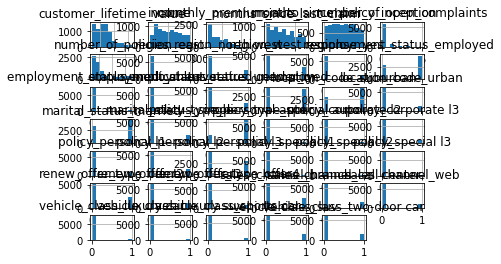

In [43]:
X_train.hist()

In [44]:
power=PowerTransformer().fit(X_train_scaled)   ##. finding the parameters ( mean, variance from the training set )

In [47]:
power= PowerTransformer()
power.fit(X_train_scaled)
X_train_trans = power.transform(X_train_scaled)
X_test_trans = power.transform(X_test_scaled)


In [48]:
# We should check is now looks normal distributed

<b> Apply linear regression

In [48]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

<b> model parameters  (b1,b2,b3,b4,b5,b6,b7)

In [49]:
model.coef_

array([ 2.82793692e+00, -2.70637409e+00,  6.34347005e+01, -1.05097787e+00,
       -8.33202175e-01,  1.18020337e+00, -2.49475602e+00,  7.36756229e+00,
       -5.77854277e-01,  4.61933093e-01, -3.27003082e+00,  2.40021505e+00,
       -1.67099895e+00, -2.51636367e+00, -6.69252795e+00, -9.48390838e-01,
       -4.88850542e-01,  1.79833067e+00,  1.53234015e+01,  1.36434218e+00,
        1.72816827e+02,  8.27908392e+01,  1.38049100e+00,  1.30867201e+01,
       -8.07849071e+14, -5.28273176e+14, -1.80847820e+00, -2.15183903e+00,
        6.34624066e+14,  7.77553718e+14,  8.97336786e+14,  2.18781822e+14,
        3.48747718e+14,  3.42143779e+14,  2.94800164e+00,  1.98817316e+00,
        5.36026255e+00,  1.39647754e+00,  6.57064447e-01,  8.42320208e-01,
        1.08951622e+01,  1.08016489e+01,  5.71950840e+00,  1.23235647e+01,
        1.30531617e+00])

In [50]:
model.intercept_

387.87053270874014

<b> Making predictions

We make predictions (y_pred) using X_test_scaled

In [51]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [52]:
y_pred.shape

(3207,)

In [53]:
y_pred_train.shape

(7482,)

In [54]:
y.shape

(10689,)

### Model evaluation

In [55]:
y_test

4665     345.0
4072     345.0
4549     257.0
4211     445.0
3081     523.0
         ...  
3488     404.0
1667     554.0
1516     350.0
10215     27.0
2931     320.0
Name: total_claim_amount, Length: 3207, dtype: float64

In [56]:
y_pred.shape   #same shape as y_test

(3207,)

In [57]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
4665,345.0,434.129342
4072,345.0,394.804873
4549,257.0,230.146870
4211,445.0,399.412344
3081,523.0,418.172889
...,...,...
3488,404.0,383.287344
1667,554.0,494.407943
1516,350.0,481.453443
10215,27.0,42.845971


### Analizing the model. What kind of plot you will get if all the all the predictions are ok? A stright line

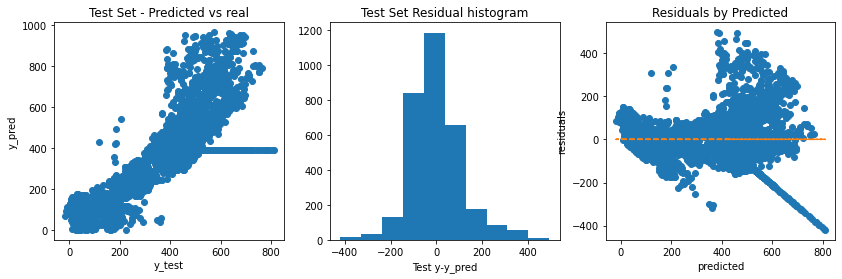

In [58]:
# Make an scatter plot y_pred vs y

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [60]:
# first plot: checking linearity
# second plot: checking normality of residuals. It is a normal distribution, and the majority of residuals are close to 0. good! 
# --> No over or under estimation
# third plot: checking homoscedasticity. No constance variance. Predictions are very bad

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

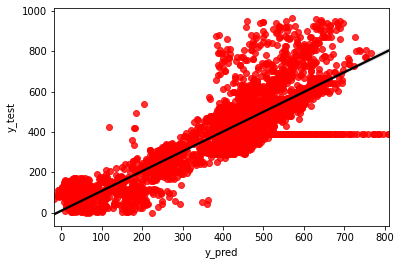

In [59]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Model evaluation

- MSE = Mean Squared Error

In [60]:
mse(y_test,y_pred)

13197.390767811617

- RMSE

In [61]:
rms = mse(y_test, y_pred, squared=False)
rms

114.87989714398084

In [64]:
#It's seem its a huge number!

- MAE = Mean Absolute Error

In [62]:
mae(y_test,y_pred)

84.00869690471302

- r2

In [63]:
R2 = r2_score(y_test,y_pred)
R2

0.6903330384003481

- Adjusted r2

In [64]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.685924619143156

### Evaluate error metrics also on train test

- If error_train very high -> Underfitting ( consider other model or to  add more variables)
- If error_train <= error_test -> Ok
- If error_train very small and <<<< error_test -> Overfitting!!!! ( you overtrained your model  or you did not applied the transformer to the test set ).


In [65]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [66]:
R2_test, R2_train   #OK

(0.6903330384003481, 0.6873030034508529)

### Feature importance
- In order to check which independent features are more relevant to your model, compare the absolute value of each coefficient.

In [67]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [68]:
features_importances

,Attribute,Importance
30,policy_personal l3,8.973368e+14
24,policy_type_personal auto,8.078491e+14
29,policy_personal l2,7.775537e+14
28,policy_personal l1,6.346241e+14
25,policy_type_special auto,5.282732e+14
32,policy_special l2,3.487477e+14
33,policy_special l3,3.421438e+14
31,policy_special l1,2.187818e+14
20,location_code_suburban,1.728168e+02
21,location_code_urban,8.279084e+01


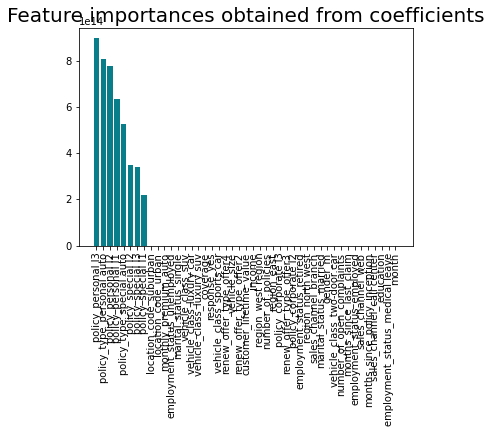

In [69]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

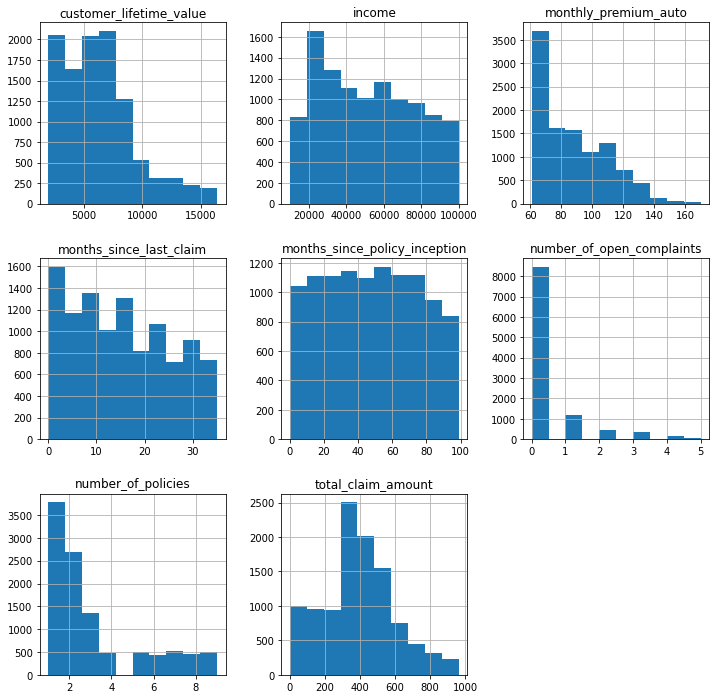

In [71]:
numerical.hist(figsize=(12,12))

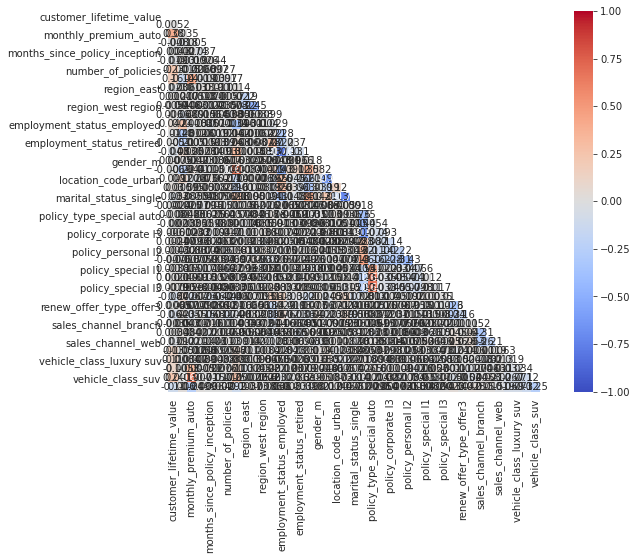

In [70]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [72]:
corr = df.corr()
corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
customer_lifetime_value,1.000000,0.005161,0.384882,-0.008032,-0.004328,-0.018734,0.234248,0.163266,-0.023177,0.011595,...,-0.006463,-0.064094,-0.003542,0.003356,-0.019447,0.126181,0.106969,0.102804,0.241292,-0.108843
income,0.005161,1.000000,0.003464,-0.018013,0.011509,0.013057,-0.001515,-0.136529,0.006002,0.001731,...,0.006659,0.023061,-0.004288,0.018077,0.011746,-0.005116,-0.008400,-0.005756,0.001901,0.015936
monthly_premium_auto,0.384882,0.003464,1.000000,-0.004986,0.007441,-0.018583,-0.019515,0.399782,-0.013312,0.000509,...,-0.016983,-0.055186,0.007142,0.004235,-0.021232,-0.000213,0.000704,0.303331,0.610583,-0.235558
months_since_last_claim,-0.008032,-0.018013,-0.004986,1.000000,-0.036883,-0.002617,0.006791,-0.019449,0.012994,-0.013422,...,-0.009203,-0.014512,0.007070,0.012418,-0.014072,0.006757,0.008880,-0.000507,-0.007097,0.009935
months_since_policy_inception,-0.004328,0.011509,0.007441,-0.036883,1.000000,0.004368,-0.009719,-0.013248,0.018963,0.007053,...,0.000864,-0.067973,0.015632,-0.020834,0.007344,0.006932,0.013545,0.022071,-0.015326,-0.000643
number_of_open_complaints,-0.018734,0.013057,-0.018583,-0.002617,0.004368,1.000000,0.002748,-0.009746,0.011269,-0.010391,...,-0.001165,-0.011062,-0.011146,0.001709,-0.011040,0.002469,0.008821,-0.007575,-0.016518,-0.001974
number_of_policies,0.234248,-0.001515,-0.019515,0.006791,-0.009719,0.002748,1.000000,-0.016721,-0.010306,0.005704,...,0.008062,-0.074386,-0.014350,0.006896,0.012648,-0.004773,-0.008879,0.007119,-0.011125,-0.009167
total_claim_amount,0.163266,-0.136529,0.399782,-0.019449,-0.013248,-0.009746,-0.016721,1.000000,0.014334,-0.002215,...,-0.015605,-0.028496,0.000330,0.005460,-0.009074,0.070464,0.073091,0.108839,0.253806,-0.103247
region_east,-0.023177,0.006002,-0.013312,0.012994,0.018963,0.011269,-0.010306,0.014334,1.000000,-0.192856,...,-0.006501,-0.003152,0.004330,-0.006240,-0.013979,0.010792,-0.013070,-0.032395,-0.000260,0.003651
region_north west,0.011595,0.001731,0.000509,-0.013422,0.007053,-0.010391,0.005704,-0.002215,-0.192856,1.000000,...,-0.006017,-0.002261,-0.007154,-0.006411,0.020224,-0.010080,0.009821,0.004521,-0.000561,0.012985
